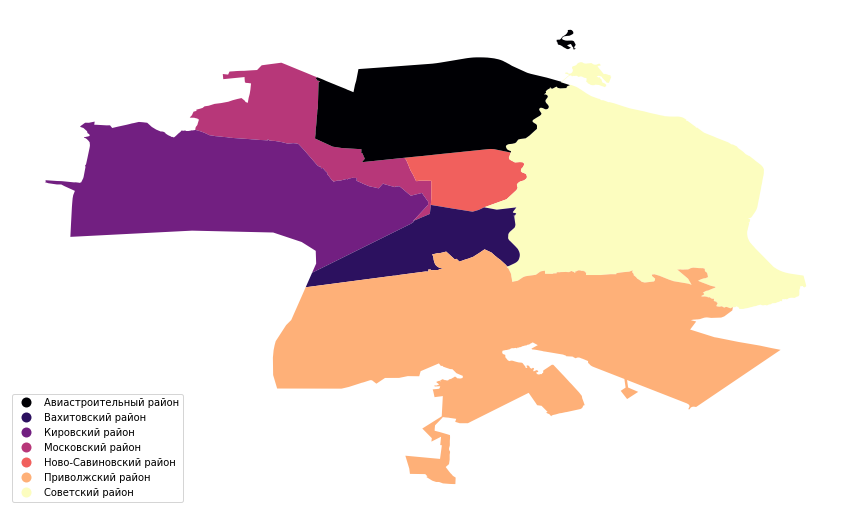

In [8]:
import requests
from shapely.geometry import Polygon,MultiPolygon
import geopandas as gpd
import matplotlib.pyplot as plt

districts=['Московский район','Кировский район','Ново-Савиновский район','Советский район','Вахитовский район','Приволжский район','Авиастроительный район']
district_coord=[]
for district in districts:
    d=requests.get('http://nominatim.openstreetmap.org/search?format=json&q='+district.split()[0]+'+'+district.split()[1]+'+%2C+Казань%2C+городской+округ+Казань%2C+Татарстан%2C+Приволжский+федеральный+округ%2C+Россия&polygon_geojson=1')
    f=d.json()[0]['geojson']['coordinates']
    if d.json()[0]['geojson']['type']=='MultiPolygon':
        pols=[]
        for obj in f:
            for po in obj:
                pols.append(Polygon(po))
        district_coord.append(MultiPolygon(pols))
    else:
        district_coord.append(Polygon(d.json()[0]['geojson']['coordinates'][0]))
WGS84 = {'init': 'epsg:4326'}
MERC = {'init': 'epsg:3857'}
gdf=gpd.GeoDataFrame(districts,crs=WGS84,geometry=district_coord)
gdf.columns=['district','geometry']
ax=gdf.plot(column='district',cmap='magma',figsize=(15,15),legend=True,legend_kwds={'loc':'lower left'})
gdf.to_file('Kazan_Distr.geojson',encoding='utf-8',driver='GeoJSON')
ax.set_axis_off()
plt.show()